In [1]:
%run resources/library.py

In [2]:
style_notebook()

# Notebook 5: Plotting Voronoi Polygons with Folium

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Load data from previous notebooks

In [4]:
deaths_gdf = gpd.read_file('outputs/deaths.shp')
pumps_gdf = gpd.read_file('outputs/pumps.shp')
pumps_df = pd.read_csv('data/pumps.csv')
clipped_voronoi_counts_gdf = gpd.read_file('outputs/clipped_voronoi_counts.shp')\
    .rename(columns={'points_in_':'points_in_voronoi',\
                     'vorpoint_l':'vorpoint_lat', 'vorpoint_1':'vorpoint_lon'})

clipped_voronoi_counts_gdf

,vorpoint_lat,vorpoint_lon,FID,Street,points_in_voronoi,geometry
0,51.513341,-0.136668,250,Broadwick Street,137,"POLYGON ((-0.13640 51.51752, -0.13483 51.51780..."
1,51.513876,-0.139586,251,Kingly Street,38,"POLYGON ((-0.14106 51.51142, -0.14153 51.51193..."
2,51.514906,-0.139671,252,Ramillies Place,1,"POLYGON ((-0.14191 51.51420, -0.14161 51.51539..."
3,51.512354,-0.131630,253,Dean Street,0,"POLYGON ((-0.13006 51.51359, -0.12994 51.51343..."
4,51.512139,-0.133594,254,Rupert Street,41,"POLYGON ((-0.13329 51.51745, -0.13327 51.51743..."
5,51.511542,-0.135919,255,Bridle Lane,21,"POLYGON ((-0.13655 51.50871, -0.13677 51.50878..."
6,51.510019,-0.133962,256,Regent Street,0,"POLYGON ((-0.13138 51.50977, -0.13255 51.50861..."
7,51.511295,-0.138199,257,Warwick Street,12,"POLYGON ((-0.13677 51.50878, -0.13878 51.50938..."


In [5]:
pumps_gdf

,FID,Street,geometry
0,250,Broadwick Street,POINT (-0.13667 51.51334)
1,251,Kingly Street,POINT (-0.13959 51.51388)
2,252,Ramillies Place,POINT (-0.13967 51.51491)
3,253,Dean Street,POINT (-0.13163 51.51235)
4,254,Rupert Street,POINT (-0.13359 51.51214)
5,255,Bridle Lane,POINT (-0.13592 51.51154)
6,256,Regent Street,POINT (-0.13396 51.51002)
7,257,Warwick Street,POINT (-0.13820 51.51130)


### Create new data set combining `clipped_voronoi_counts_gdf` and `pumps_df`

This enables us to display number of death locations within each voronoi cell for each pump.

In [6]:
clipped_voronoi_gdf = \
    pd.DataFrame(clipped_voronoi_counts_gdf[['FID','Street','points_in_voronoi']])

clipped_voronoi_gdf

,FID,Street,points_in_voronoi
0,250,Broadwick Street,137
1,251,Kingly Street,38
2,252,Ramillies Place,1
3,253,Dean Street,0
4,254,Rupert Street,41
5,255,Bridle Lane,21
6,256,Regent Street,0
7,257,Warwick Street,12


### Let's merge the two dataframes, `pumps_df` and `clipped_voronoi_gdf`

Note we excluded the `geometry` from `clipped_voronoi_gdf`.

In [7]:
pumps_voronoi_gdf = \
    pd.merge(pumps_df, clipped_voronoi_gdf, on=['FID','Street'], how='inner')\
                        .rename(columns={'points_in_voronoi':'Locations with Deaths'})

pumps_voronoi_gdf

,FID,LON,LAT,Street,Locations with Deaths
0,250,-0.136668,51.513341,Broadwick Street,137
1,251,-0.139586,51.513876,Kingly Street,38
2,252,-0.139671,51.514906,Ramillies Place,1
3,253,-0.131630,51.512354,Dean Street,0
4,254,-0.133594,51.512139,Rupert Street,41
5,255,-0.135919,51.511542,Bridle Lane,21
6,256,-0.133962,51.510019,Regent Street,0
7,257,-0.138199,51.511295,Warwick Street,12


In [8]:
deaths_gdf.head()

,FID,DEATHS,geometry
0,0,3,POINT (-0.13793 51.51342)
1,1,2,POINT (-0.13788 51.51336)
2,2,1,POINT (-0.13785 51.51332)
3,3,1,POINT (-0.13781 51.51326)
4,4,4,POINT (-0.13777 51.51320)


### Review Matplotlib combined plots

Text(0.5, 1.0, 'Deaths Locations within Pump-derived Voronoi Cells, Soho District')

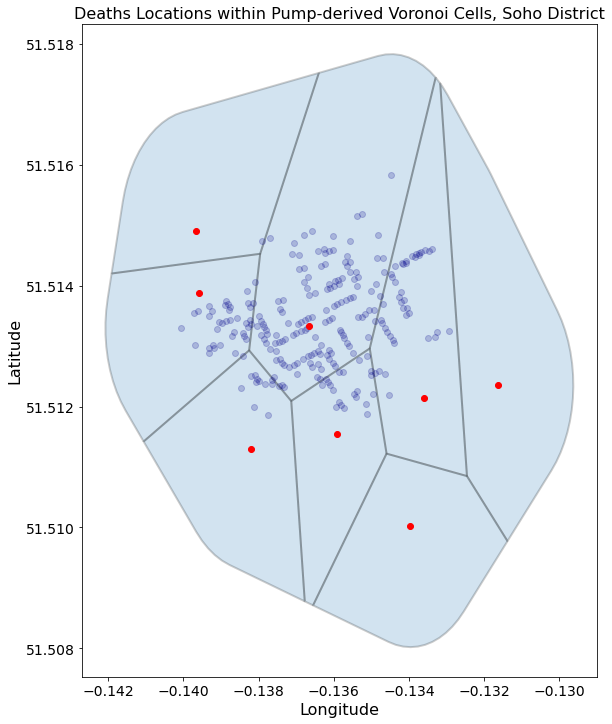

In [9]:
width = 15
height = 12

fig, ax = plt.subplots(figsize=(width, height))
clipped_voronoi_counts_gdf.plot(ax=ax, alpha=0.2, edgecolor='black',linewidth=2)
deaths_gdf.plot(ax=ax, alpha=0.2, color='darkblue')
pumps_gdf.plot(ax=ax,color='red')
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
# always good to remember, x maps to longitude, y maps to latitude 
ax.set_ylabel('Latitude', fontsize=16)
ax.set_xlabel('Longitude', fontsize=16)
ax.set_title('Deaths Locations within Pump-derived Voronoi Cells, Soho District', \
             fontsize=16)

### Review death locations in voronoi polygons

Text(0.5, 0, 'Location Count, Voronoi Cells of Pumps (by Street Location)')

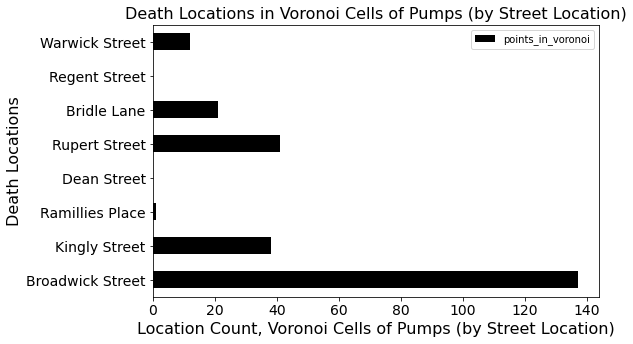

In [10]:
ax = pd.DataFrame(clipped_voronoi_counts_gdf)\
    .plot.barh(y='points_in_voronoi', x='Street', color='k', figsize=(8,5))
ax.set_title('Death Locations in Voronoi Cells of Pumps (by Street Location)', fontsize=16)
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.set_ylabel('Death Locations', fontsize=16)
ax.set_xlabel('Location Count, Voronoi Cells of Pumps (by Street Location)', fontsize=16)

## Reusing Cholera Basic Folium Code

### Examine the newly created merged data set

In [11]:
pumps_voronoi_gdf

,FID,LON,LAT,Street,Locations with Deaths
0,250,-0.136668,51.513341,Broadwick Street,137
1,251,-0.139586,51.513876,Kingly Street,38
2,252,-0.139671,51.514906,Ramillies Place,1
3,253,-0.131630,51.512354,Dean Street,0
4,254,-0.133594,51.512139,Rupert Street,41
5,255,-0.135919,51.511542,Bridle Lane,21
6,256,-0.133962,51.510019,Regent Street,0
7,257,-0.138199,51.511295,Warwick Street,12


### Reconstruct the folium map from the Cholera Basic Case Study and add Voronoi polygons

Don't forget to use full-screen button, and click on the markers to see the updated pop-ups.

In [12]:
import pandas as pd
import folium

# let's import the folium plugins
from folium import plugins

deaths_df = pd.read_csv('data/cholera_deaths.csv')
# for the pumps we will use the newly created data set: pumps_voronoi_gdf

SOHO_COORDINATES = (51.513578, -0.136722)

map2 = folium.Map(location=SOHO_COORDINATES, zoom_start=17)

folium.TileLayer('cartodbpositron').add_to(map2)

# Let's begin drawing the voronoi polygons as the first layer
# This voronoi polygon generation section has two "for" loops
# Loop #1: Extract column data including geometry
for index, row in clipped_voronoi_counts_gdf.iterrows():
    
    # adjust voronoi cell fill color based on points_in_voronoi value
    if row['points_in_voronoi'] > 130:
        color = 'red'
    elif row['points_in_voronoi'] <= 130 and row['points_in_voronoi'] > 40:
        color = 'orange'
    elif row['points_in_voronoi'] <= 40 and row['points_in_voronoi'] > 1:
        color = 'yellow'
    else:
        color = None
        
    # prepare for second "for" loop

    # create an empty list to hold lat,lon pairs 
    poly_list = []
    
    # extract x and y (lon and lat) from voronoi polygon (geometry column)
    x,y = row['geometry'].exterior.coords.xy
    
    # pair each x and y, like a zipper (zip)
    mapped = zip(x,y)
    
    # second "for" loop
    # create each polygon as lat, lon list (node the change in order)
    for lon,lat in mapped:
        poly_list.append([lat,lon])
    
    # add the folium Polygon
    folium.Polygon(poly_list,\
                    color='grey',\
                    weight=1,\
                    fill_opacity=0.2, \
                    fill_color=color).add_to(map2)
                                           
locationlist = deaths_df[["LAT","LON"]].values.tolist()
radiuslist = deaths_df[["DEATHS"]].values.tolist()

# Iterate through the rows of the cholera deaths data frame 
#    and add each cholera death circle marker to map1
for i in range(0, len(locationlist)):

    # Each marker will show point information and 
    #   number of deaths in that location.
    #
    # Compose popup text as HTML string
    popup_text = '<b>Location:</b> '+'('+str(locationlist[i][0])+\
                 ', '+str(locationlist[i][1])+')'+\
                 '<br/>'+\
                 '<b>Deaths:</b> '+ str(radiuslist[i][0])
    # Create a popup for each marker
    popup_death = folium.Popup(popup_text, max_width=200)
    
    # Add each circle marker with popup representing 
    #   a location with deaths to map1
    folium.CircleMarker(
                    location=locationlist[i], \
                    radius=radiuslist[i], \
                    popup=popup_death, \
                    color='black', \
                    weight=1, \
                    fill=True, \
                    fill_color='red', \
                    fill_opacity=1).add_to(map2)
    
# Iterate through the rows of the pumps_df data frame 
#   and add each water pump to map1
for each in pumps_voronoi_gdf.iterrows():
    
    # Each marker will show pump location information
    # Compose popup text
    popup_text = '<b>Location:</b> '+'('+str(each[1]['LAT'])+', '+\
                 str(each[1]['LON'])+')'+\
                 '<br/>'+\
                 '<b>Street Name:</b> '+each[1]['Street']+\
                 '<br/>'+\
                 '<b>Death Locations in Voronoi:</b> '+\
                 str(each[1]['Locations with Deaths'])
    # Create a popup for each marker
    popup_pump = folium.Popup(popup_text, max_width=200)

    # Add each circle marker with popup representing 
    #   a pump location to map1
    folium.RegularPolygonMarker([each[1]['LAT'],each[1]['LON']], \
                    color='black', \
                    weight=1,\
                    fill_opacity=1, \
                    fill_color='blue', \
                    number_of_sides=4, \
                    popup=popup_pump, \
                    radius=10).add_to(map2)
    
# let's use the "Fullscreen" plugin
# add the button to the top right corner
plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True
).add_to(map2)

map2

## Questions

1. What other areas or types of geospatial use cases can we use Voronoi diagrams?

## Congratulations

You completed the Voronoi diagram exercise for the Cholera Digital Case Study.

## References

1. Learn more about GeoJSON: https://macwright.org/2015/03/23/geojson-second-bite.html